<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/model_vxvy_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx', sheet_name='label_30')

In [3]:
feature.describe()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan/i1,Fan/i2,Fan/i3,Fan/i4,Fan/i5,Fan/i6,Fan/o1,Fan/o2,Fan/o3,Fan/o4,Fan/o5,Fan/o6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,180.333333,1.883333,29.691667,0.750000,0.750000,0.500000,0.500000,0.500000,0.250000,0.750000,0.750000,0.500000,0.500000,0.500000,0.250000
std,0.501307,0.501307,97.809588,1.911479,2.035274,0.434145,0.434145,0.501307,0.501307,0.501307,0.434145,0.434145,0.434145,0.501307,0.501307,0.501307,0.434145
min,0.000000,0.000000,47.000000,0.100000,26.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,95.500000,0.375000,27.925000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,167.000000,0.950000,29.850000,1.000000,1.000000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,251.500000,3.875000,31.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,341.000000,5.300000,33.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
label.describe()

,koor_x,koor_y,Vx,Vy,Temp
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,54.883160,101.048611,0.012273,-0.004701,25.359077
std,40.591469,55.065126,0.052255,0.070281,3.200991
min,1.000000,6.000000,-0.339456,-0.442086,19.901247
25%,20.000000,64.000000,0.000000,-0.013963,23.058064
50%,55.000000,100.000000,0.004428,0.000000,25.183301
75%,94.000000,149.000000,0.030821,0.016093,27.636549
max,131.000000,202.000000,0.219833,0.480368,33.937473


In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame = remap(frame,0.5,-0.5)
  array_y.append(frame)

In [8]:
! mkdir models

y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.005)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}')

mkdir: cannot create directory ‘models’: File exists


In [9]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [10]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [11]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 48, 2), (30, 48, 2))

In [12]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

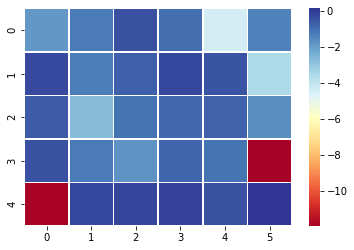

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

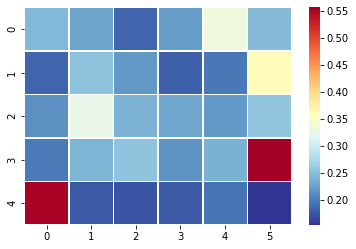

In [14]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

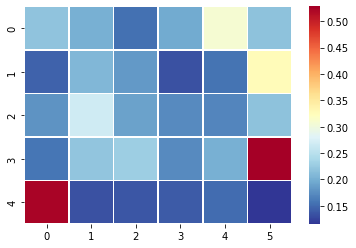

In [15]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [16]:
scenarios = 5   #0-28
indexing = 1    # vx,vy

In [17]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]

In [18]:
a

array([-0.01283824, -0.13325609, -0.08855366, -0.1634264 ,  0.18812754,
        0.20720743, -0.00112143,  0.28184687,  0.27992268,  0.05035412,
       -0.15204352, -0.5       , -0.3110578 ,  0.4197449 ,  0.26062956,
        0.11764042, -0.02377663,  0.10695294, -0.4147789 , -0.32177936,
       -0.23303799, -0.18479119, -0.35579069, -0.5       , -0.5       ,
       -0.06466978, -0.18216036,  0.06227358,  0.18333786, -0.14971576])

In [19]:
b

array([-0.07817604, -0.22632508, -0.18813103, -0.27773414,  0.14645434,
        0.16430454, -0.01975069,  0.29969925,  0.28380235,  0.00652011,
       -0.19919599, -0.48251329, -0.40542844,  0.46439566,  0.2678487 ,
        0.12390627,  0.05349561,  0.09925335, -0.45867687, -0.36430392,
       -0.29849304, -0.25162651, -0.45266357, -0.49320755, -0.48187833,
       -0.14719238, -0.2711565 , -0.08991501, -0.03103214, -0.19228141])

In [20]:
r2(a,b), mse(a,b), mae(a,b)

(0.9091854547586629, 0.005651539757907522, 0.05881078536371729)

In [21]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

In [22]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_30')

In [23]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [24]:
angin_test = kec_angin(y_testing,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [25]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [26]:
tampilan_vektor(angin_test,50,0.1)

In [27]:
tampilan_vektor(angin_pred,50,0.1)

In [28]:
!zip -r /content/models_vxvy_30_a0005.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 25 (deflated 28%)
  adding: content/models/model 18 (deflated 26%)
  adding: content/models/model 27 (deflated 32%)
  adding: content/models/model 4 (deflated 33%)
  adding: content/models/model 23 (deflated 37%)
  adding: content/models/model 26 (deflated 31%)
  adding: content/models/model 3 (deflated 36%)
  adding: content/models/model 11 (deflated 37%)
  adding: content/models/model 0 (deflated 30%)
  adding: content/models/model 21 (deflated 34%)
  adding: content/models/model 14 (deflated 32%)
  adding: content/models/model 9 (deflated 31%)
  adding: content/models/model 2 (deflated 34%)
  adding: content/models/model 13 (deflated 31%)
  adding: content/models/model 19 (deflated 29%)
  adding: content/models/model 8 (deflated 28%)
  adding: content/models/model 16 (deflated 29%)
  adding: content/models/model 12 (deflated 30%)
  adding: content/models/model 28 (deflated 34%)
  adding: content/models/model 10 (de